In [1]:
#Librerie utili
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

In [2]:
con = sqlite3.connect("../code/omnet/simulations/results/simulate.sca")

In [3]:
#THROUGHPUT

dfThroughput=pd.read_sql_query("""
SELECT clients, scenario, config, AVG(statCount) / 3800.0 as throughput 
FROM runConfig NATURAL JOIN statistic
WHERE statName = "completedTransactions:stats" 
GROUP BY scenario,config, clients, moduleName
ORDER BY clients
""", con)

dfThroughput.describe()

#Getting all the configurations in the simulation table (column config)
configurations=dfThroughput['config'].unique()

#Getting all the scenarios in the simulation table (column config)
scenarios=dfThroughput['scenario'].unique()



['c1' 'c2' 'c3' 'c4' 'c5' 'c6' 'c7' 'c8']


,clients,scenario,config,throughput
667,21,s4,c4,2.384263
668,21,s4,c5,2.385421
669,21,s4,c6,0.239526
670,21,s4,c7,0.238605
671,21,s4,c8,2.381079


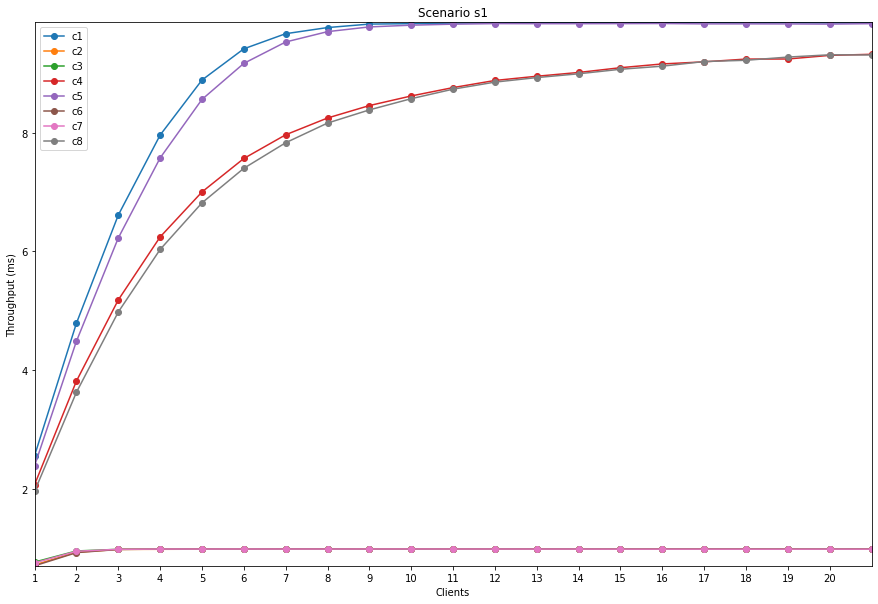

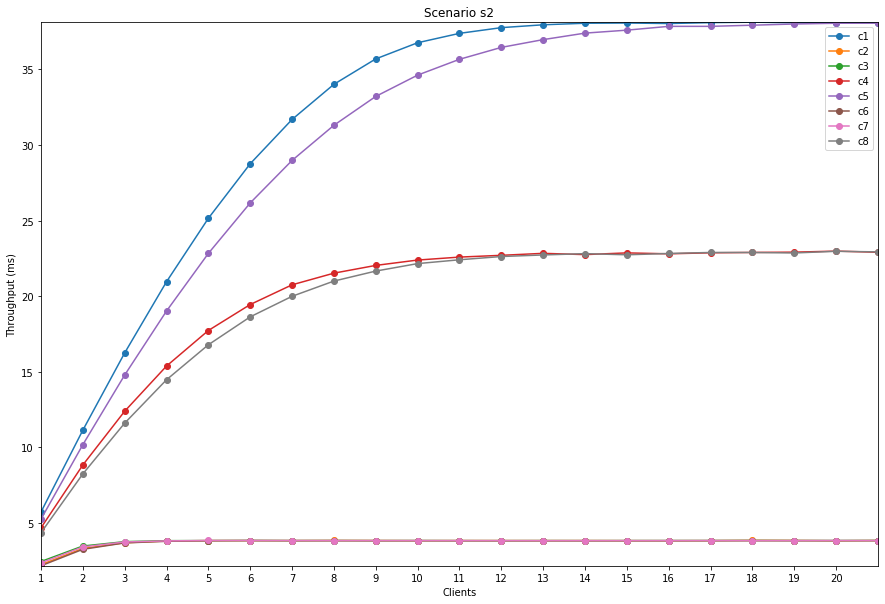

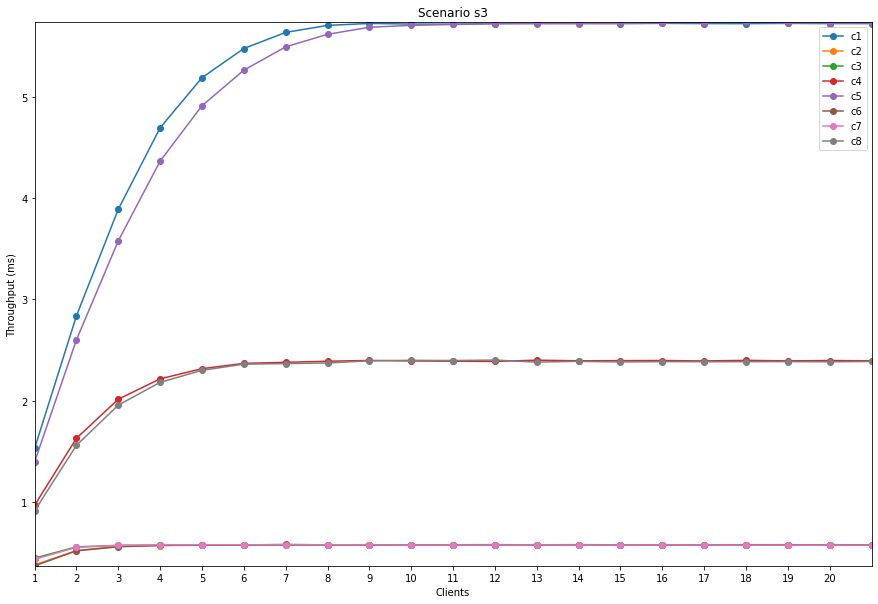

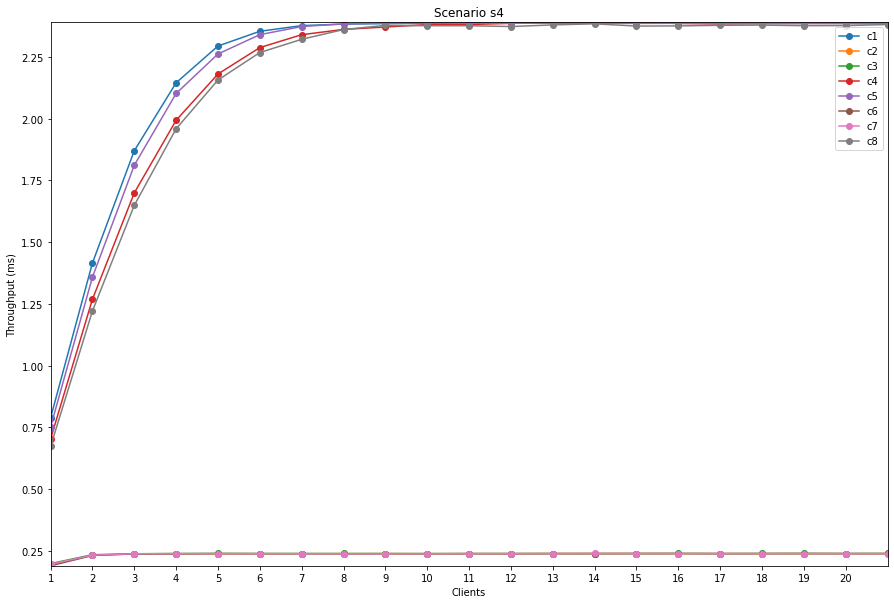

In [11]:
#for every config plot graph

for scenario in scenarios:
    plt.figure(figsize=(15,10))
    plt.title("Scenario "+scenario)
    plt.margins(0)
    plt.xticks(range(dfThroughput['clients'].min(),dfThroughput['clients'].max()))
    for conf in configurations:
        dfTemp=dfThroughput.loc[(dfThroughput['scenario']== scenario) & (dfThroughput['config'] == conf)]
        plt.plot(dfTemp['clients'], dfTemp['throughput'],marker='o')
    
    plt.xlabel('Clients') 
    plt.ylabel('Throughput (ms)')
    plt.legend(configurations)
    plt.show()



     clients scenario config  responseTime
667       21       s4     c4      8.388980
668       21       s4     c5      8.388319
669       21       s4     c6     83.406737
670       21       s4     c7     83.625144
671       21       s4     c8      8.401866


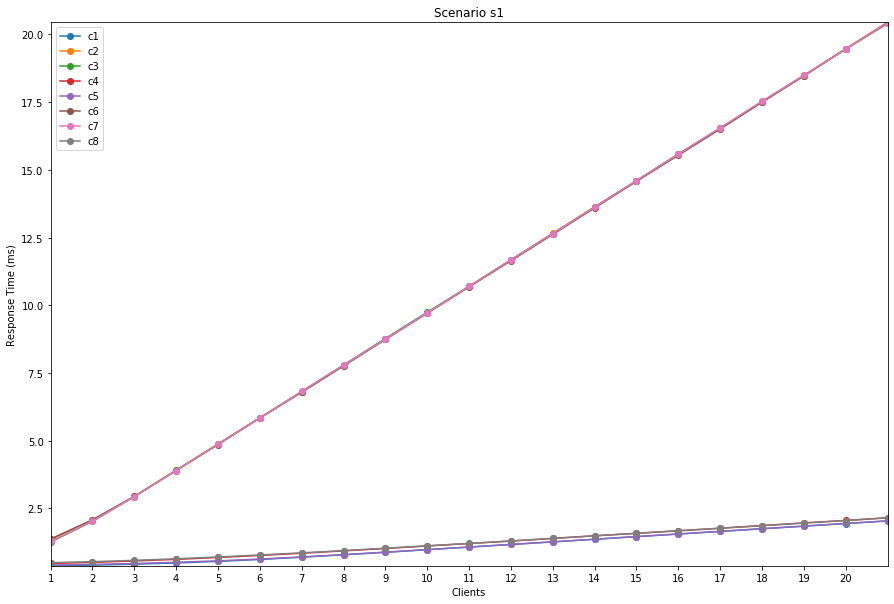

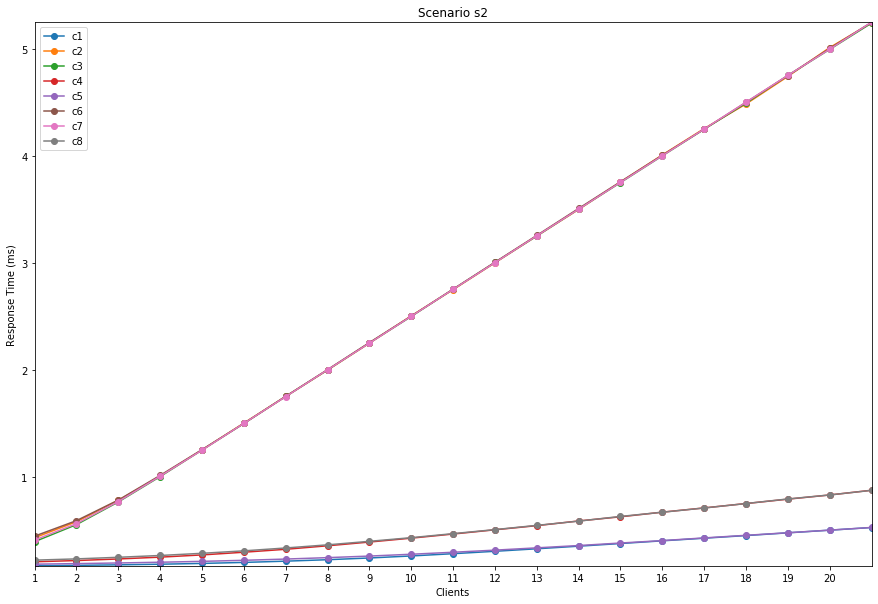

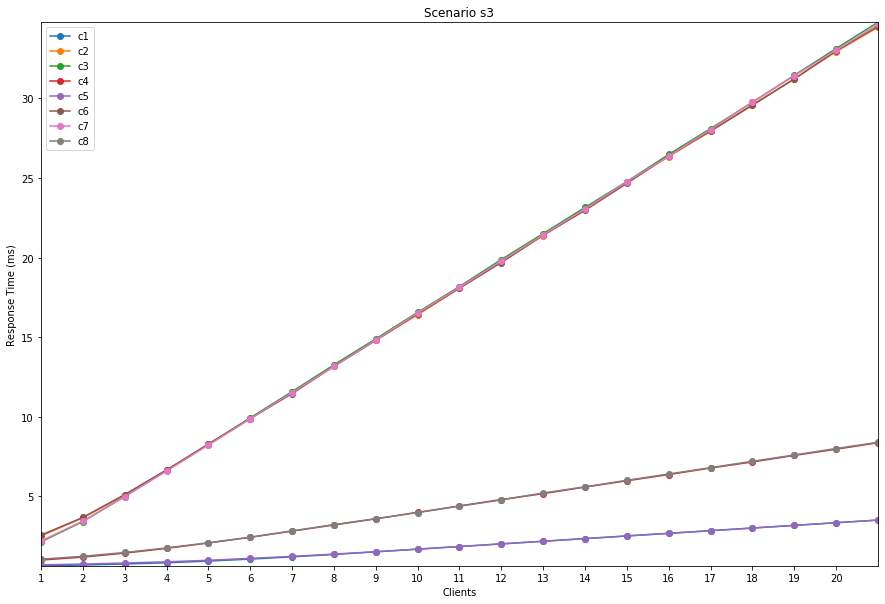

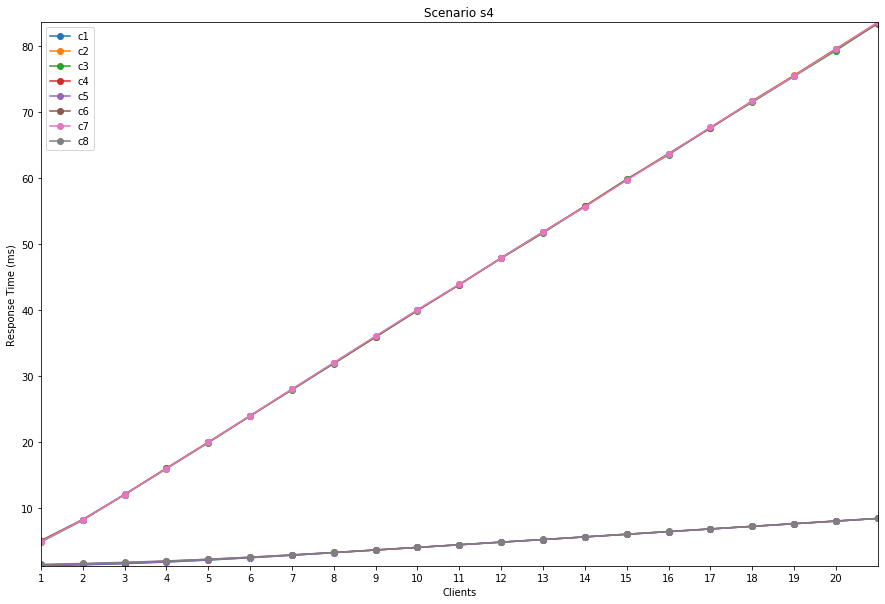

In [19]:
#RENSPONSE TIME

dfResponseTime=pd.read_sql_query("""
SELECT clients, scenario, config,AVG(statMean) as responseTime 
FROM runConfig NATURAL JOIN statistic
WHERE 
		statName = "responseTimeStat:stats" AND
		moduleName = "Network"
GROUP BY scenario,config, clients
ORDER BY clients
""", con)

for scenario in scenarios:
    plt.figure(figsize=(15,10))
    plt.title("Scenario "+scenario)
    plt.margins(0)
    plt.xticks(range(dfResponseTime['clients'].min(),dfResponseTime['clients'].max()))
    for conf in configurations:
        dfTemp=dfResponseTime.loc[(dfResponseTime['scenario']== scenario) & (dfResponseTime['config'] == conf)]
        plt.plot(dfTemp['clients'], dfTemp['responseTime'],marker='o')
    
    plt.xlabel('Clients') 
    plt.ylabel('Response Time (ms)')
    plt.legend(configurations)
    plt.show()





,clients,scenario,config,moduleName,utilization
0,1,s1,c1,Network.remote_server,0.246695
1,1,s1,c1,Network.server.disk,0.024866
2,1,s1,c1,Network.server.processor,0.007494
3,1,s1,c2,Network.remote_server,0.694020
4,1,s1,c2,Network.server.disk,0.068480
...,...,...,...,...,...
499,21,s1,c7,Network.server.disk,0.009523
500,21,s1,c7,Network.server.processor,0.028743
501,21,s1,c8,Network.remote_server,0.905494
502,21,s1,c8,Network.server.disk,0.904770


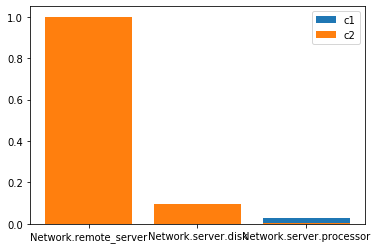

<Figure size 1080x720 with 0 Axes>

In [40]:
#UTILIZATION

dfUtilization=pd.read_sql_query("""
SELECT clients, scenario, config, moduleName, AVG(statSum)/3800 as utilization 
FROM runConfig NATURAL JOIN statistic
WHERE scenario = "s1" AND
		statName = "workingStat:stats"
GROUP BY config, clients, moduleName
ORDER BY clients
""", con)


dfTemp=dfUtilization.loc[(dfUtilization['scenario']== 's1') & (dfUtilization['config'] == 'c1')]
plt.bar(dfTemp['moduleName'], dfTemp['utilization'])
dfTemp=dfUtilization.loc[(dfUtilization['scenario']== 's1') & (dfUtilization['config'] == 'c2')]
plt.bar(dfTemp['moduleName'], dfTemp['utilization'])
plt.legend(configurations)





dfUtilization.loc[dfUtilization['scenario']== 's1']

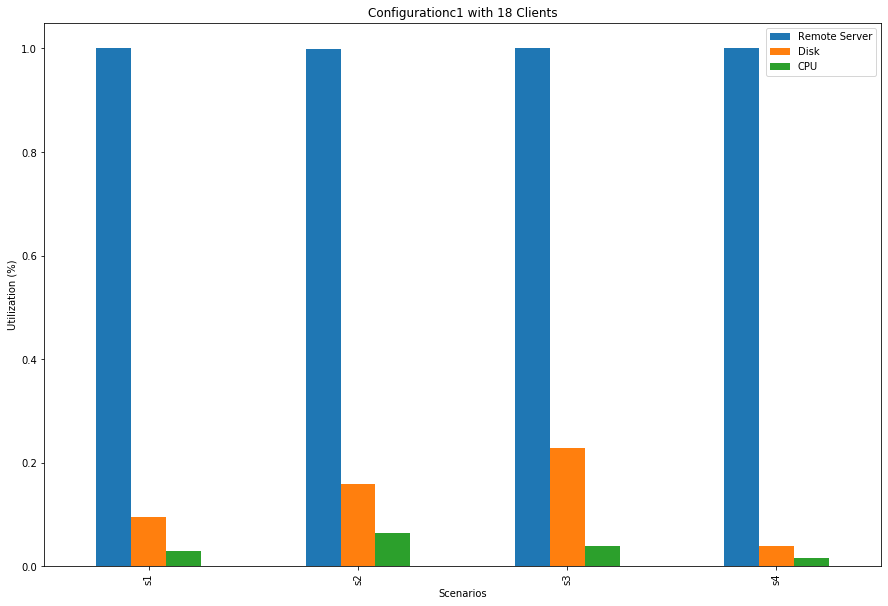

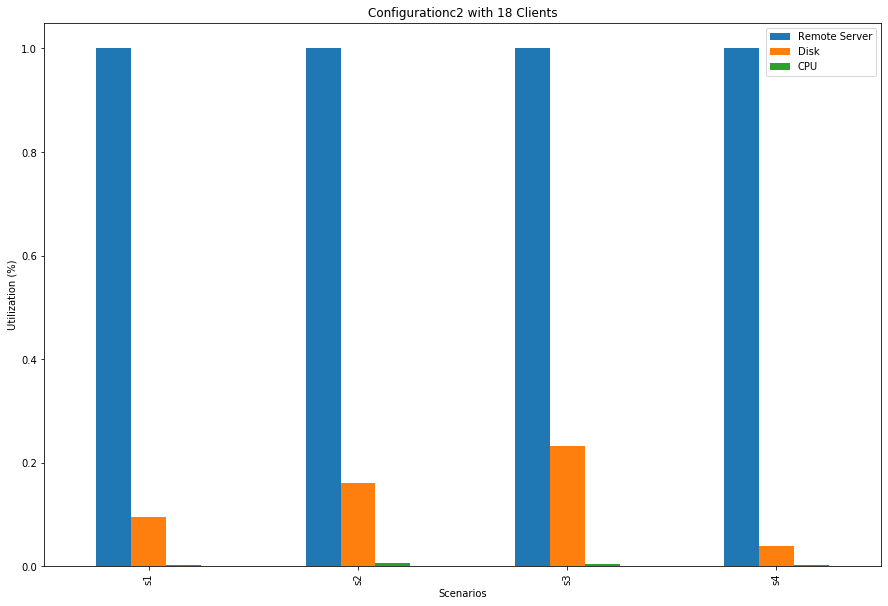

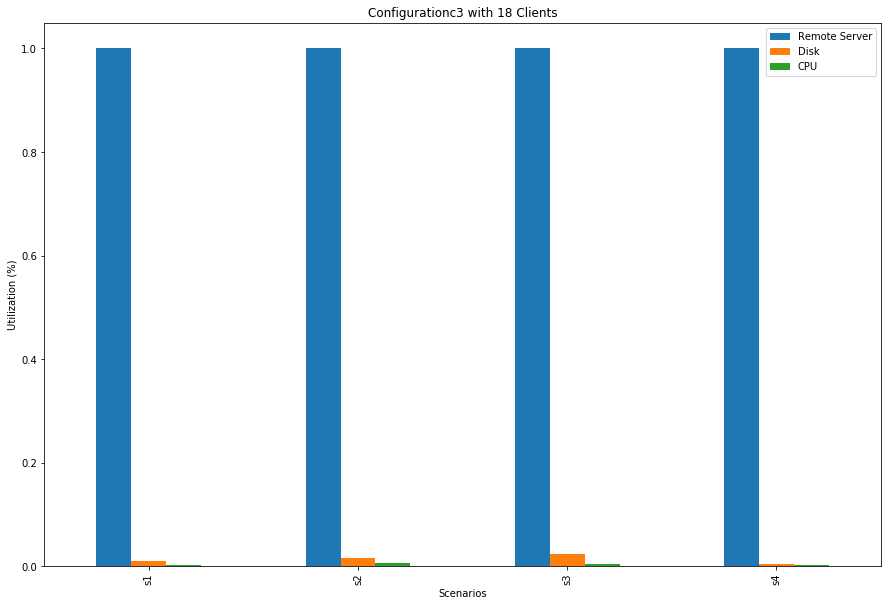

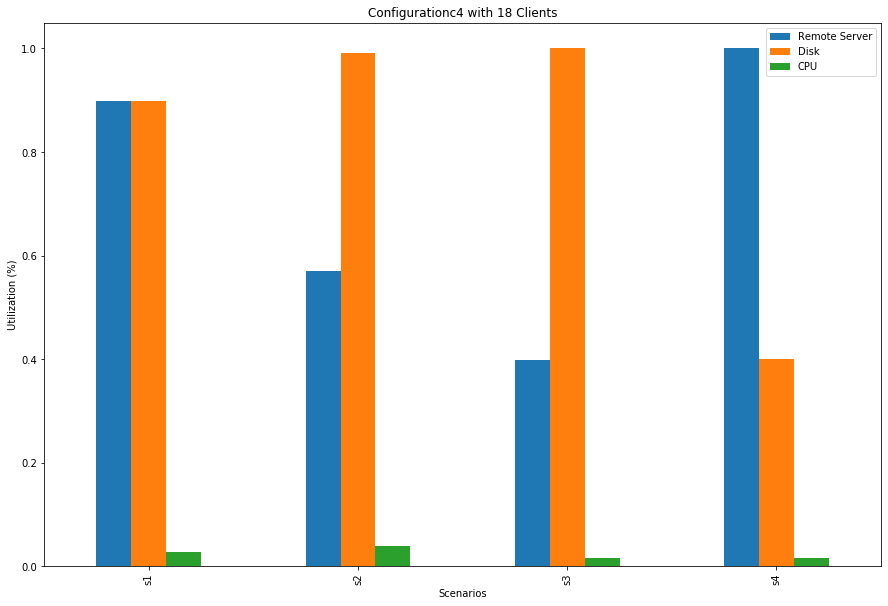

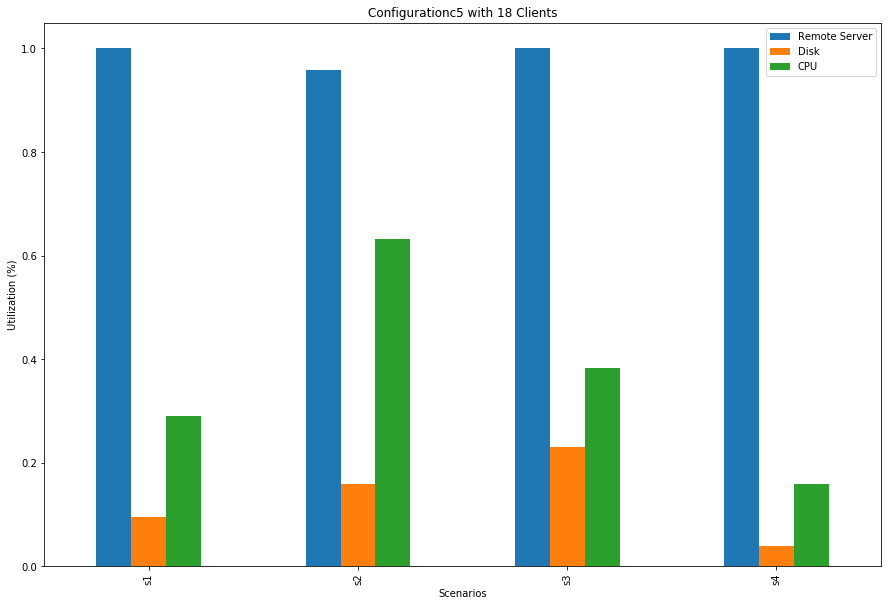

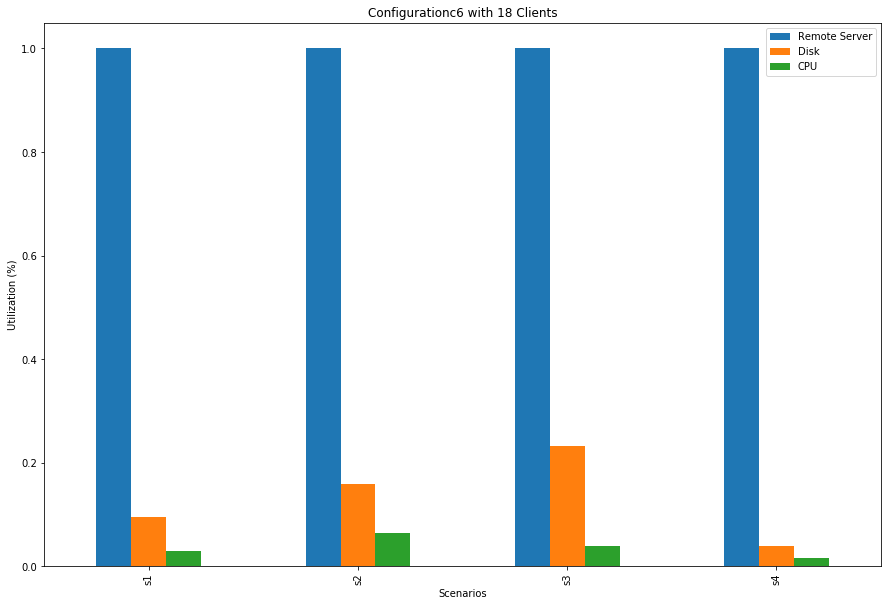

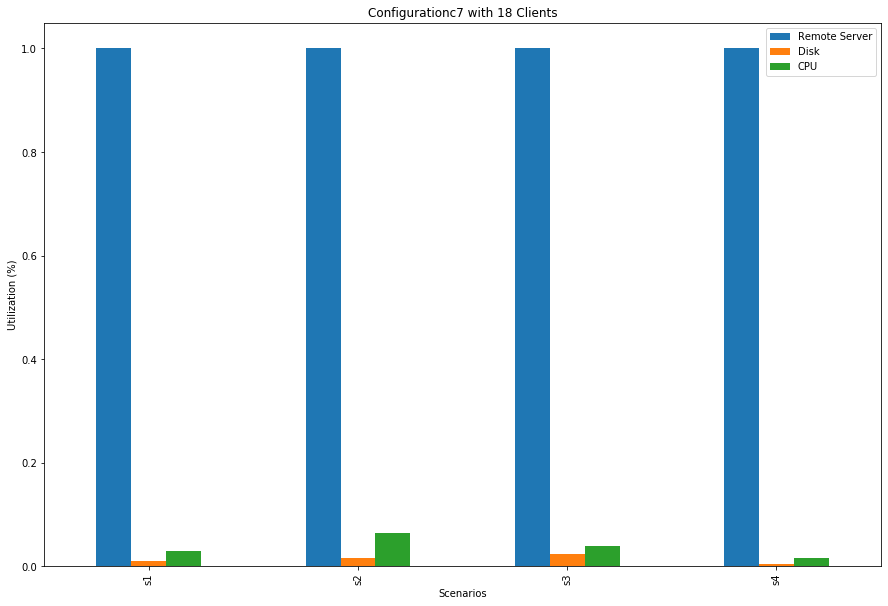

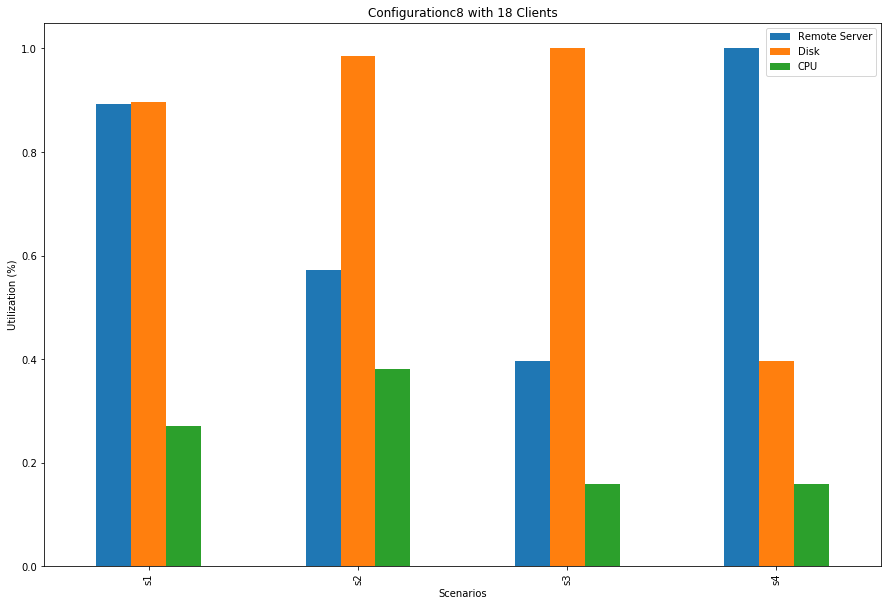

In [119]:
#Query
dfUtilization=pd.read_sql_query("""
SELECT clients, scenario, config, moduleName, AVG(statSum)/3800 as utilization 
FROM runConfig NATURAL JOIN statistic
WHERE
		statName = "workingStat:stats"
GROUP BY scenario,config, clients, moduleName
ORDER BY clients
""", con)

#Set here number of clients
clientsNum=18


for conf in configurations:

    dfTemp=dfUtilization.loc[(dfUtilization['clients']== clientsNum)&(dfUtilization['config']== conf)]

    #Mappare nuovi nomi per i moduli in modo che si vedano bene nei grafici

    dfTemp.groupby(['scenario', 'moduleName'])['utilization'].mean().unstack().plot.bar(figsize=(15,10))
    plt.title('Configuration'+conf+' with '+str(clientsNum)+' Clients')

    plt.xlabel('Scenarios') 
    plt.ylabel('Utilization (%)')
    plt.legend(['Remote Server',"Disk","CPU"])
    plt.show()

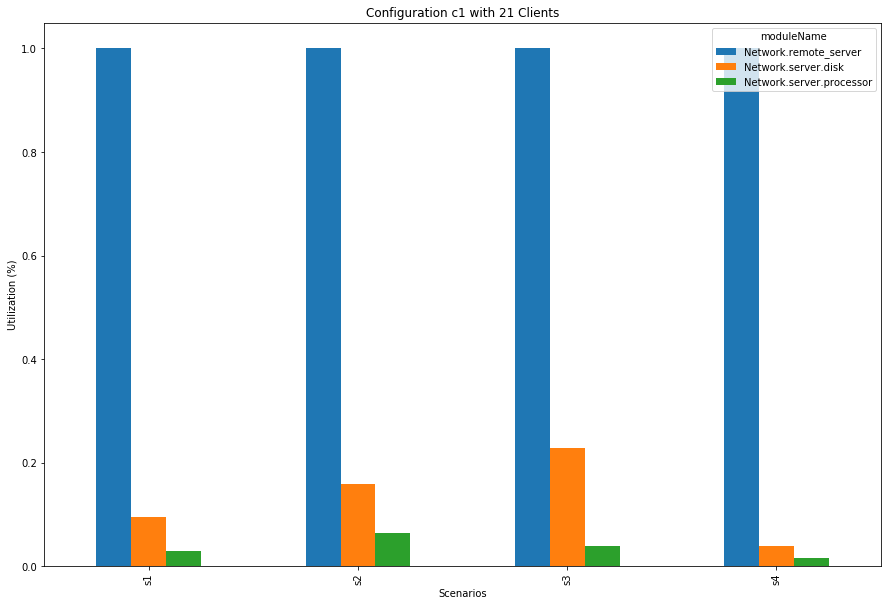

In [112]:
#Query
dfUtilization=pd.read_sql_query("""
SELECT clients, scenario, config, moduleName, AVG(statSum)/3800 as utilization 
FROM runConfig NATURAL JOIN statistic
WHERE
		statName = "workingStat:stats"
GROUP BY scenario,config, clients, moduleName
ORDER BY clients
""", con)

dfTemp=dfUtilization.loc[(dfUtilization['clients']== 21)&(dfUtilization['config']== 'c1')]

#Mappare nuovi nomi per i moduli in modo che si vedano bene nei grafici

dfTemp.groupby(['scenario', 'moduleName'])['utilization'].mean().unstack().plot.bar(figsize=(15,10))
plt.title('Configuration c1 with 21 Clients')

plt.xlabel('Scenarios') 
plt.ylabel('Utilization (%)')
plt.show()



In [64]:
dfTemp=dfUtilization.loc[(dfUtilization['scenario']== 's1') & (dfUtilization['moduleName'] == 'Network.remote_server')& (dfUtilization['clients'] == 1)]
print(dfTemp)

    clients scenario config             moduleName  utilization
0         1       s1     c1  Network.remote_server     0.246695
3         1       s1     c2  Network.remote_server     0.694020
6         1       s1     c3  Network.remote_server     0.741984
9         1       s1     c4  Network.remote_server     0.199277
12        1       s1     c5  Network.remote_server     0.230397
15        1       s1     c6  Network.remote_server     0.680933
18        1       s1     c7  Network.remote_server     0.726733
21        1       s1     c8  Network.remote_server     0.188604


In [8]:
con.close()